# Predicting the Sale Price of Properties in Ames, Iowa

### Objective of this Project
---
This project aims to inform potential home sellers and property investors in Ames of the top ten characteristics that will increase the value of their homes. Given a set of characteristics of their property, they will be able to get an estimation of their property value from the prediction model. 

### Background of Ames, Iowa
---
Ames is a city in Story County, Iowa, United States, located approximately 50km north of Des Moines in central Iowa. It is best known as the home of Iowa State University (ISU), with leading leading agriculture, design, engineering, and veterinary medicine colleges. <br/>
<br/>
In 2010, Ames was ranked ninth on [CNNMoney's "Best Places to Live"](https://money.cnn.com/magazines/moneymag/bplive/2010/snapshots/PL1901855.html) list! As Ames has been regularly named as one of the best places to live in, this project was established to analyse and predict house prices for potential home buyers relocating to Ames, or for those home sellers that would like to earn some money off selling their Ames properties.<br/>
<br/>
In 2019, Ames had a population of 66,258. Iowa State University was home to 33,391 students as of fall 2019, which make up approximately one half of the city's population. This high proportion of student population will have an effect on the property market with their lifestyle and amenities provided in the city. For example, Campustown is a high-density mixed-use neighborhood directly south of Iowa State University Central Campus that is home to many student apartments, nightlife venues, restaurants, and numerous other establishments, most of which are unique to Ames. <br/>
<br/>
Ames has a humid continential climate, with hot summers up to 39degC and cold winters down to -33degC. This extreme range of temperature throughout the year means that heating and airconditioning will be an important consideration to home buyers. 

### Project Description
---
This project uses the Ames Housing Dataset to create a regression model for predicting sale price of a given property with given set of features. As the dataset contains an extensive set of more than 80 features, the link to the [data dictionary](http://jse.amstat.org/v19n3/decock/DataDocumentation.txt) will be provided instead. 

# 1. Cleaning and EDA

## Overview
---
This section will drop or impute missing data values, and draw basic insights from the datasets using inferential statistics. Two versions of cleaned datasets has been produced as fine-tuning for the modelling in later parts, from minimal cleaning to feature engineering. Both training and test sets (for Kaggle Submission) are cleaned simultaneously. <br/>
>#### Version 0
Description: Impute and drop missing data values <br/>
Exported data: train_clean_v0.csv, test_clean_v0.csv <br/>
>#### Version 1
Description: Log transformation of `SalePrice`, Reducing multicollinearity by dropping some predictor variables <br/>
Exported data: train_clean_v1.csv, test_clean_v1.csv <br/>

## Importing Libraries
---

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
# allows us to see all rows and columns 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
# limit floats to 3 decimal points

import numpy as np

import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

import missingno as msno

## Load the Data
---

In [2]:
df_train = pd.read_csv('../data/train.csv')
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,nan,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.000,Gd,TA,CBlock,TA,TA,No,GLQ,533.000,Unf,0.000,192.000,725.000,GasA,Ex,Y,SBrkr,725,754,0,1479,0.000,0.000,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.000,RFn,2.000,475.000,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.000,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.000,Gd,TA,PConc,Gd,TA,No,GLQ,637.000,Unf,0.000,276.000,913.000,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.000,0.000,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.000,RFn,2.000,559.000,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.000,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,Gd,CBlock,TA,TA,No,GLQ,731.000,Unf,0.000,326.000,1057.000,GasA,TA,Y,SBrkr,1057,0,0,1057,1.000,0.000,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.000,Unf,1.000,246.000,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.000,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.000,TA,TA,PConc,Gd,TA,No,Unf,0.000,Unf,0.000,384.000,384.000,GasA,Gd,Y,SBrkr,744,700,0,1444,0.000,0.000,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.000,Fin,2.000,400.000,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.000,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.000,TA,TA,PConc,Fa,Gd,No,Unf,0.000,Unf,0.000,676.000,676.000,GasA,TA,Y,SBrkr,831,614,0,1445,0.000,0.000,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.000,Unf,2.000,484.000,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
df_test = pd.read_csv('../data/test.csv')
df_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.000,9142,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,6,8,1910,1950,Gable,CompShg,AsbShng,AsbShng,None,0.000,TA,Fa,Stone,Fa,TA,No,Unf,0,Unf,0,1020,1020,GasA,Gd,N,FuseP,908,1020,0,1928,0,0,2,0,4,2,Fa,9,Typ,0,NaN,Detchd,1910.000,Unf,1,440,Po,Po,Y,0,60,112,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,nan,9662,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,5,4,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.000,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1967,1967,GasA,TA,Y,SBrkr,1967,0,0,1967,0,0,2,0,6,2,TA,10,Typ,0,NaN,Attchd,1977.000,Fin,2,580,TA,TA,Y,170,0,0,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.000,17104,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.000,Gd,TA,PConc,Gd,Gd,Av,GLQ,554,Unf,0,100,654,GasA,Ex,Y,SBrkr,664,832,0,1496,1,0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2006.000,RFn,2,426,TA,TA,Y,100,24,0,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.000,8520,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,5,6,1923,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.000,Gd,TA,CBlock,TA,TA,No,Unf,0,Unf,0,968,968,GasA,TA,Y,SBrkr,968,0,0,968,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1935.000,Unf,2,480,Fa,TA,N,0,0,184,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,nan,9500,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1963,1963,Gable,CompShg,Plywood,Plywood,BrkFace,247.000,TA,TA,CBlock,Gd,TA,No,BLQ,609,Unf,0,785,1394,GasA,Gd,Y,SBrkr,1394,0,0,1394,1,0,1,1,3,1,TA,6,Typ,2,Gd,Attchd,1963.000,RFn,2,514,TA,TA,Y,0,76,0,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [4]:
# defining function for checking df shapes
def df_shape(df1, df2):
    print(df1.shape)
    print(df2.shape)
    
df_shape(df_train, df_test)

(2051, 81)
(878, 80)


In [5]:
# checking the difference in columns between two datasets
set(df_train.columns) - set(df_test.columns) 

{'SalePrice'}

In [6]:
# changing the column names to lowercase and replacing ' ' with '_'
df_train.columns = map(str.lower, df_train.columns)
df_train.columns = [x.replace(' ', '_') for x in df_train.columns]
df_test.columns = map(str.lower, df_test.columns)
df_test.columns = [x.replace(' ', '_') for x in df_test.columns]

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               878 non-null    int64  
 1   pid              878 non-null    int64  
 2   ms_subclass      878 non-null    int64  
 3   ms_zoning        878 non-null    object 
 4   lot_frontage     718 non-null    float64
 5   lot_area         878 non-null    int64  
 6   street           878 non-null    object 
 7   alley            58 non-null     object 
 8   lot_shape        878 non-null    object 
 9   land_contour     878 non-null    object 
 10  utilities        878 non-null    object 
 11  lot_config       878 non-null    object 
 12  land_slope       878 non-null    object 
 13  neighborhood     878 non-null    object 
 14  condition_1      878 non-null    object 
 15  condition_2      878 non-null    object 
 16  bldg_type        878 non-null    object 
 17  house_style     

## Data Cleaning: Outliers
---

From the data description -
> There are 5 observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will indicate them quickly). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these 5 unusual observations) before assigning it to students. <br/>

This portion will remove any unusual observations (`Gr Liv Area` more than 4000 square feet) from the datasets as recommended.

<Figure size 1440x1440 with 0 Axes>

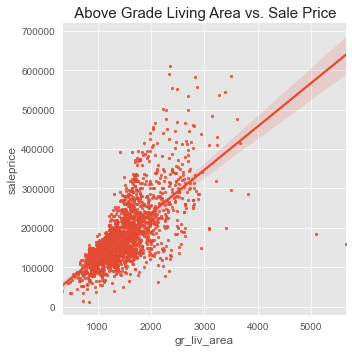

In [9]:
plt.figure(figsize=(20,20))
sns.lmplot(x='gr_liv_area', y='saleprice', data=df_train, scatter_kws={"s": 5})
plt.title(label = ' Above Grade Living Area vs. Sale Price', fontsize = 15)
plt.tight_layout()
plt.savefig('../images/saleprice_grlivarea_scatter_train.png', dpi = 150)

Since there are only 2 data values that has `Gr Liv Area` of more than 4000 square feet in the training dataset, there should be 3 remaining ones in the testing dataset. The 3 data values in the testing dataset will not be removed as they are required to pass the Kaggle submission.

In [10]:
# showing the outlier index
df_train[df_train['gr_liv_area'] > 4000]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.000,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.000,Unf,0.000,466.000,6110.000,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.000,0.000,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.000,Fin,2.000,1418.000,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.000,39290,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.000,Ex,TA,PConc,Ex,TA,Gd,GLQ,4010.000,Unf,0.000,1085.000,5095.000,GasA,Ex,Y,SBrkr,5095,0,0,5095,1.000,1.000,2,1,2,1,Ex,15,Typ,2,Gd,Attchd,2008.000,Fin,3.000,1154.000,TA,TA,Y,546,484,0,0,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [11]:
# removing the outliers
df_train = df_train[df_train['gr_liv_area'] < 4000]
df_train.shape

(2049, 81)

## Data Cleaning: Drop or Impute missing data values
---

In [12]:
# defining function for checking null values of each dataframe
def check_col_null_values(header):
    print(f"df_train column '{header}' has {df_train[header].isnull().sum()} null values.")
    print(f"df_test column '{header}' has {df_test[header].isnull().sum()} null values.")

### Visualizing no. of Missing Data Values

In [13]:
# defining function for bar plot
def missingno(df, title):
    fig = plt.figure(figsize=(20,10))
    plt.title(label = title, fontsize = 25)
    msno.bar(df, labels=True, fontsize=12, color = 'lightblue')
    plt.tight_layout
    plt.show()
    return fig

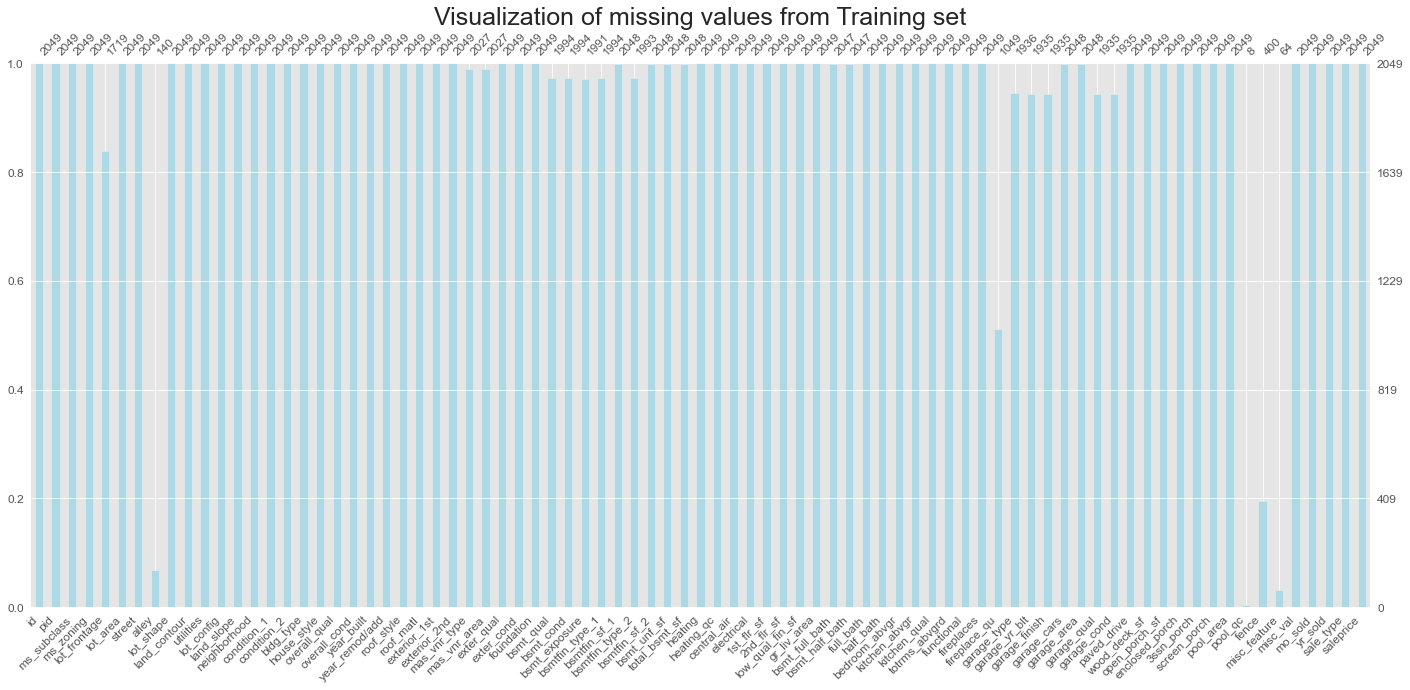

In [14]:
fig = missingno(df_train, 'Visualization of missing values from Training set')
fig.savefig('../images/missingvalues_train.png', transparent = True)

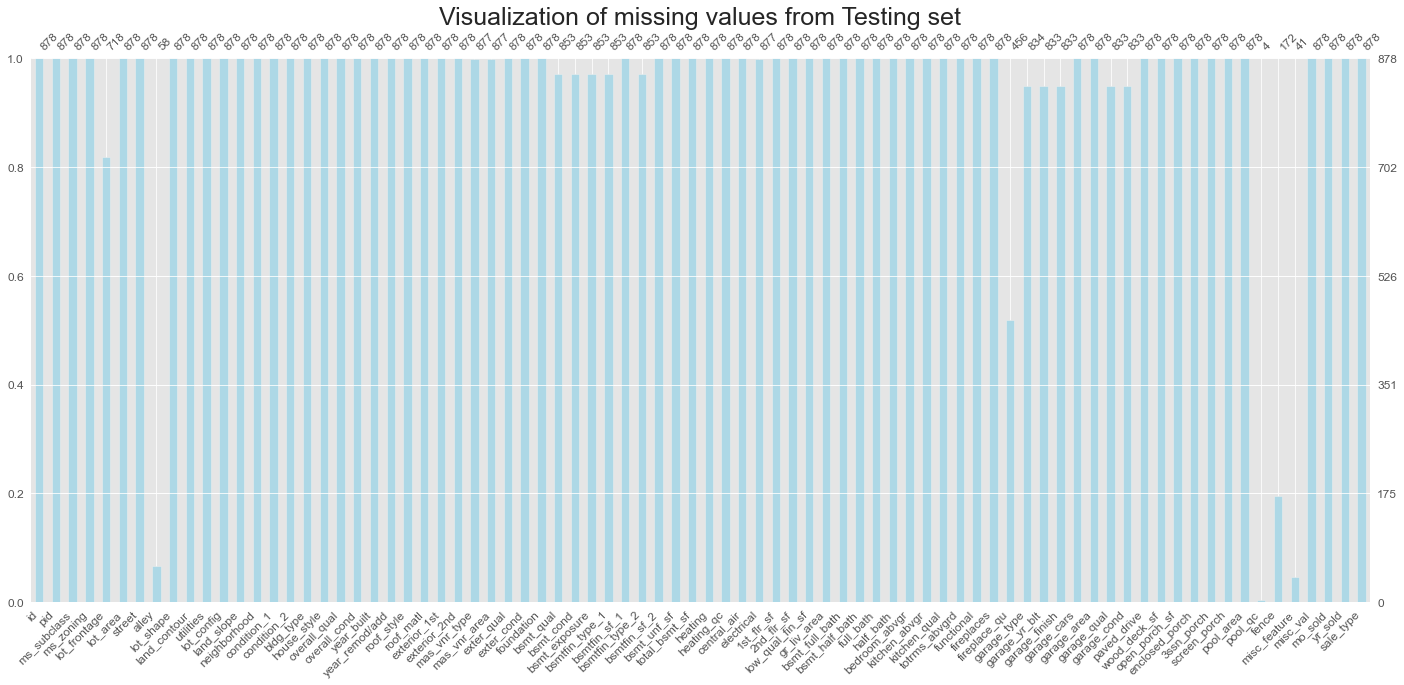

In [15]:
fig = missingno(df_test, 'Visualization of missing values from Testing set')
fig.savefig('../images/missingvalues_test.png', transparent = True)

### Dropping columns with more than 80% of missing data values

>`Alley` : Type of alley access to property <br/>
`Fireplace Qu` : Fireplace quality <br/>
`Pool QC` : Pool quality <br/>
`Fence` : Fence quality <br/>
`Misc Feature` : Miscellaneous feature not covered in other categories 

As seen in the bar charts for both datasets, features that are missing more than 80% data are `Alley`, `Fireplace Qu`, `Pool QC`, `Fence`, `Misc Feature`. These columns will be dropped from both datasets due to the lack of data.

>`PID` : Parcel identification number  - can be used with city web site for parcel review. 

Since this feature is for identification purposes only, `PID` will be also dropped from the datasets.

In [16]:
df_train.drop(['alley', 'fireplace_qu', 
               'pool_qc', 'fence', 
               'misc_feature', 'pid'], axis=1, inplace=True)
df_test.drop(['alley', 'fireplace_qu', 
               'pool_qc', 'fence', 
               'misc_feature', 'pid'], axis=1, inplace=True)
df_shape(df_train, df_test)

(2049, 75)
(878, 74)


There are still missing values in the datasets. From looking at the data dictionary, some missing values may be due to the property not having that feature. The section below will take a closer look at each of the features and decide whether to impute or drop the column/row accordingly.

### Lot Frontage - Imputing missing data values with mean value

`Lot Frontage` : Linear feet of street connected to property. <br/>
This may have a significant impact on the `SalePrice` as it could indicate accessibility to the property. Also, it is highly likely that there will be a street connecting to each property, hence the values might be genuinely missing.

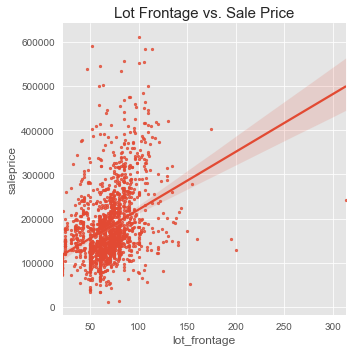

In [17]:
sns.lmplot(x='lot_frontage', y='saleprice', data=df_train, scatter_kws={"s": 5})
plt.title(label = 'Lot Frontage vs. Sale Price', fontsize = 15)
plt.tight_layout()
plt.savefig('../images/saleprice_lotfrontage_scatter_train.png', transparent = True)

Since there is a reasonably significant linear relationship between `Lot Frontage` and `SalePrice`, we will impute it with the mean value of the series in both datasets. 

In [18]:
df_train['lot_frontage'].mean()

68.87899941826643

In [19]:
df_test['lot_frontage'].mean()

69.54596100278552

In [20]:
# Impute mean value
df_train['lot_frontage'].fillna(df_train['lot_frontage'].mean(), inplace=True)
df_test['lot_frontage'].fillna(df_test['lot_frontage'].mean(), inplace=True)
check_col_null_values('lot_frontage')

df_train column 'lot_frontage' has 0 null values.
df_test column 'lot_frontage' has 0 null values.


### Masonry Veneer Type and Masonry Veneer Area - Imputing missing data with `None`, `NA` or `0`

`Mas Vnr Type` : Masonry Veneer Type <br/>
`Mas Vnr Area` : Masonry Veneer Area in square feet <br/>

In [21]:
check_col_null_values('mas_vnr_type')

df_train column 'mas_vnr_type' has 22 null values.
df_test column 'mas_vnr_type' has 1 null values.


In [22]:
check_col_null_values('mas_vnr_area')

df_train column 'mas_vnr_area' has 22 null values.
df_test column 'mas_vnr_area' has 1 null values.


`Mas Vnr Type` and `Mas Vnr Area` has the same no. of missing data values, meaning that there might be no masonry veneer on the property. Hence, the missing data values can be imputed with `None` and `0` according to their datatype.

In [23]:
# def function to impute None in both datasets
def impute_None(header):
    df_train[header].fillna('None', inplace=True)
    df_test[header].fillna('None', inplace=True)
    return 

# def function to impute NA in both datasets
def impute_NA(header):
    df_train[header].fillna('NA', inplace=True)
    df_test[header].fillna('NA', inplace=True)
    return 

# def function to impute None in both datasets
def impute_0(header):
    df_train[header].fillna(0, inplace=True)
    df_test[header].fillna(0, inplace=True)
    return

In [24]:
impute_None('mas_vnr_type')
impute_None('mas_vnr_type')
impute_0('mas_vnr_area')
impute_0('mas_vnr_area')

print(check_col_null_values('mas_vnr_type'))
print(check_col_null_values('mas_vnr_area'))

df_train column 'mas_vnr_type' has 0 null values.
df_test column 'mas_vnr_type' has 0 null values.
None
df_train column 'mas_vnr_area' has 0 null values.
df_test column 'mas_vnr_area' has 0 null values.
None


### Basement Features - Imputing missing data with `None`, `NA` or `0`

`Bsmt Qual` : Height of the basement <br/>
`Bsmt Cond` : General condition of the basement <br/>
`Bsmt Exposure` : Walkout or garden level basement walls <br/>
`BsmtFin Type 1` : Quality of basement finished area <br/>
`BsmtFin SF 1` : Type 1 finished square feet <br/>
`BsmtFin Type 2` : Quality of second finished area (if present) <br/>
`BsmtFin SF 2` : Type 2 finished square feet <br/>
`Bsmt Unf SF` : Unfinished square feet of basement area <br/>
`Total Bsmt SF` : Total square feet of basement area <br/>
`Bsmt Full Bath` : Basement full bathrooms <br/>
`Bsmt Half Bath` : Basement half bathrooms <br/>

In [25]:
print(check_col_null_values('bsmt_qual'))
print(check_col_null_values('bsmt_cond'))
print(check_col_null_values('bsmt_exposure'))
print(check_col_null_values('bsmtfin_type_1'))
print(check_col_null_values('bsmtfin_sf_1'))
print(check_col_null_values('bsmtfin_type_2'))
print(check_col_null_values('bsmtfin_sf_2'))
print(check_col_null_values('bsmt_unf_sf'))
print(check_col_null_values('total_bsmt_sf'))
print(check_col_null_values('bsmt_full_bath'))
print(check_col_null_values('bsmt_half_bath'))

df_train column 'bsmt_qual' has 55 null values.
df_test column 'bsmt_qual' has 25 null values.
None
df_train column 'bsmt_cond' has 55 null values.
df_test column 'bsmt_cond' has 25 null values.
None
df_train column 'bsmt_exposure' has 58 null values.
df_test column 'bsmt_exposure' has 25 null values.
None
df_train column 'bsmtfin_type_1' has 55 null values.
df_test column 'bsmtfin_type_1' has 25 null values.
None
df_train column 'bsmtfin_sf_1' has 1 null values.
df_test column 'bsmtfin_sf_1' has 0 null values.
None
df_train column 'bsmtfin_type_2' has 56 null values.
df_test column 'bsmtfin_type_2' has 25 null values.
None
df_train column 'bsmtfin_sf_2' has 1 null values.
df_test column 'bsmtfin_sf_2' has 0 null values.
None
df_train column 'bsmt_unf_sf' has 1 null values.
df_test column 'bsmt_unf_sf' has 0 null values.
None
df_train column 'total_bsmt_sf' has 1 null values.
df_test column 'total_bsmt_sf' has 0 null values.
None
df_train column 'bsmt_full_bath' has 2 null values.
df_t

Since these features have approximately the same no. of missing/null data values, there might be no basements on these properties. Hence, the missing data values can be imputed with `None` or `0` according to their datatype.

In [26]:
# Impute None, NA and 0 according to datatype
impute_NA('bsmt_qual') # object
impute_NA('bsmt_cond') # object
impute_NA('bsmt_exposure') # object
impute_NA('bsmtfin_type_1') # object
impute_0('bsmtfin_sf_1') # int
impute_NA('bsmtfin_type_2') # object
impute_0('bsmtfin_sf_2') # int
impute_0('bsmt_unf_sf') # int
impute_0('total_bsmt_sf') # int
impute_0('bsmt_full_bath') # int
impute_0('bsmt_half_bath') # int

### Garage Features - Imputing missing data with `None`, `NA` or `0`

`Garage Type` : Garage location <br/>
`Garage Yr Blt` : Year garage was built <br/>
`Garage Finish` : Interior finish of the garage <br/>
`Garage Cars` : Size of garage in car capacity <br/>
`Garage Area` : Size of garage in square feet <br/>
`Garage Qual` : Garage quality <br/>
`Garage Cond` : Garage conditon <br/>

In [27]:
print(check_col_null_values('garage_type'))
print(check_col_null_values('garage_yr_blt'))
print(check_col_null_values('garage_finish'))
print(check_col_null_values('garage_cars'))
print(check_col_null_values('garage_area'))
print(check_col_null_values('garage_qual'))
print(check_col_null_values('garage_cond'))

df_train column 'garage_type' has 113 null values.
df_test column 'garage_type' has 44 null values.
None
df_train column 'garage_yr_blt' has 114 null values.
df_test column 'garage_yr_blt' has 45 null values.
None
df_train column 'garage_finish' has 114 null values.
df_test column 'garage_finish' has 45 null values.
None
df_train column 'garage_cars' has 1 null values.
df_test column 'garage_cars' has 0 null values.
None
df_train column 'garage_area' has 1 null values.
df_test column 'garage_area' has 0 null values.
None
df_train column 'garage_qual' has 114 null values.
df_test column 'garage_qual' has 45 null values.
None
df_train column 'garage_cond' has 114 null values.
df_test column 'garage_cond' has 45 null values.
None


Since these features have approximately the same no. of missing data values, there might be no garage on these properties. Hence, the missing data values can be imputed with `None` or `0` according to their datatype. <br/>

In [28]:
# Impute None and 0 according to datatype
impute_NA('garage_type') # object
impute_0('garage_yr_blt') # float
impute_NA('garage_finish') # object
impute_0('garage_cars') # int
impute_0('garage_area') # int
impute_NA('garage_qual') # object
impute_NA('garage_cond') # object

### Year Features - Checking validity of data

>`Year Built` : Original construction date <br/>
`Year Remod/Add` : Remodel date (same as construction date if no remodeling or additions) <br/>
`Yr Sold` : Year Sold <br/>
`Garage Yr Blt` : Year garage was built <br/>

In [29]:
def year_data_validity(df):
    print(f"Latest Year Built : {df['year_built'].max()}")
    print(f"Latest Year Remod/Add : {df['year_remod/add'].max()}")
    print(f"Latest Garage Year Built : {df['garage_yr_blt'].max()}")
    print(f"Latest Year Sold : {df['yr_sold'].max()}")
    print(f"Latest Month Sold : {df['mo_sold'].max()}")
    print()
    print(f"Earliest Year Built : {df['year_built'].min()}")
    print(f"Earliest Year Remod/Add : {df['year_remod/add'].min()}")
    print(f"Earliest Garage Year Built : {df['garage_yr_blt'].min()}")
    print(f"Earliest Year Sold : {df['yr_sold'].min()}")
    print(f"Earliest Month Sold : {df['mo_sold'].min()}")

In [30]:
year_data_validity(df_train)

Latest Year Built : 2010
Latest Year Remod/Add : 2010
Latest Garage Year Built : 2207.0
Latest Year Sold : 2010
Latest Month Sold : 12

Earliest Year Built : 1872
Earliest Year Remod/Add : 1950
Earliest Garage Year Built : 0.0
Earliest Year Sold : 2006
Earliest Month Sold : 1


In [31]:
year_data_validity(df_test)

Latest Year Built : 2010
Latest Year Remod/Add : 2010
Latest Garage Year Built : 2010.0
Latest Year Sold : 2010
Latest Month Sold : 12

Earliest Year Built : 1880
Earliest Year Remod/Add : 1950
Earliest Garage Year Built : 0.0
Earliest Year Sold : 2006
Earliest Month Sold : 1


There seems to be an erroneous data value in the feature `Garage Yr Blt` in training dataset as the year is in the future. Related features can be checked to see if one can make an educated guess.

In [32]:
# selecting related features
outlier_garageyrblt = df_train[df_train['garage_yr_blt'] > 2010]
outlier_garageyrblt[['year_built', 'year_remod/add', 'yr_sold', 'garage_yr_blt']]

,year_built,year_remod/add,yr_sold,garage_yr_blt
1699,2006,2007,2007,2207.000


Since the `Year Remod/Add` is in 2007, we can replace the erroneous data value in `Garage Yr Blt` to match this year as an educated guess.

In [33]:
#replacing erroneous value
df_train['garage_yr_blt'] = df_train['garage_yr_blt'].replace(2207.0, 2007.0)

## Data Cleaning: Impute `NaN` values
---

In [34]:
# locating NaN values

def df_null_values(df):
    print(df.isnull().sum().sum())
    print(df.isnull().values.any())

def col_null_values(df, col):
    print(df[col].isnull().sum())
    print(df[col].isnull().values.any())

In [35]:
df_null_values(df_test)

1
True


In [36]:
# finding THAT null value in test set
for columns in df_test:
    print(columns)
    print(col_null_values(df_test, columns))

id
0
False
None
ms_subclass
0
False
None
ms_zoning
0
False
None
lot_frontage
0
False
None
lot_area
0
False
None
street
0
False
None
lot_shape
0
False
None
land_contour
0
False
None
utilities
0
False
None
lot_config
0
False
None
land_slope
0
False
None
neighborhood
0
False
None
condition_1
0
False
None
condition_2
0
False
None
bldg_type
0
False
None
house_style
0
False
None
overall_qual
0
False
None
overall_cond
0
False
None
year_built
0
False
None
year_remod/add
0
False
None
roof_style
0
False
None
roof_matl
0
False
None
exterior_1st
0
False
None
exterior_2nd
0
False
None
mas_vnr_type
0
False
None
mas_vnr_area
0
False
None
exter_qual
0
False
None
exter_cond
0
False
None
foundation
0
False
None
bsmt_qual
0
False
None
bsmt_cond
0
False
None
bsmt_exposure
0
False
None
bsmtfin_type_1
0
False
None
bsmtfin_sf_1
0
False
None
bsmtfin_type_2
0
False
None
bsmtfin_sf_2
0
False
None
bsmt_unf_sf
0
False
None
total_bsmt_sf
0
False
None
heating
0
False
None
heating_qc
0
False
None
central_air
0
False

In [37]:
df_test['electrical'].unique()

array(['FuseP', 'SBrkr', 'FuseA', 'FuseF', nan], dtype=object)

In [38]:
df_test['electrical'].value_counts()

SBrkr    813
FuseA     48
FuseF     15
FuseP      1
Name: electrical, dtype: int64

A `NaN` value has been located in the testing dataset. Since the majority of the properties has `SBrkr`, `NaN` will be replaced with `Sbkr`.

In [39]:
df_test['electrical'] = df_test['electrical'].replace(np.nan, 'SBrkr')

In [40]:
# making minimally cleaned copies of the datasets before proceeding
df_train_v0 = df_train.copy()
df_test_v0 = df_test.copy()

In [41]:
df_shape(df_train_v0, df_test_v0)

(2049, 75)
(878, 74)


## EDA: Overview of Dataset
---

### Investigating `Neighborhood` relative to `SalePrice`

Since the neighborhood of the property almost always affects property prices, we will investigate `Neighborhood` more indepth.

In [42]:
df_train['neighborhood'].nunique()

28

In [43]:
df_test['neighborhood'].nunique()

26

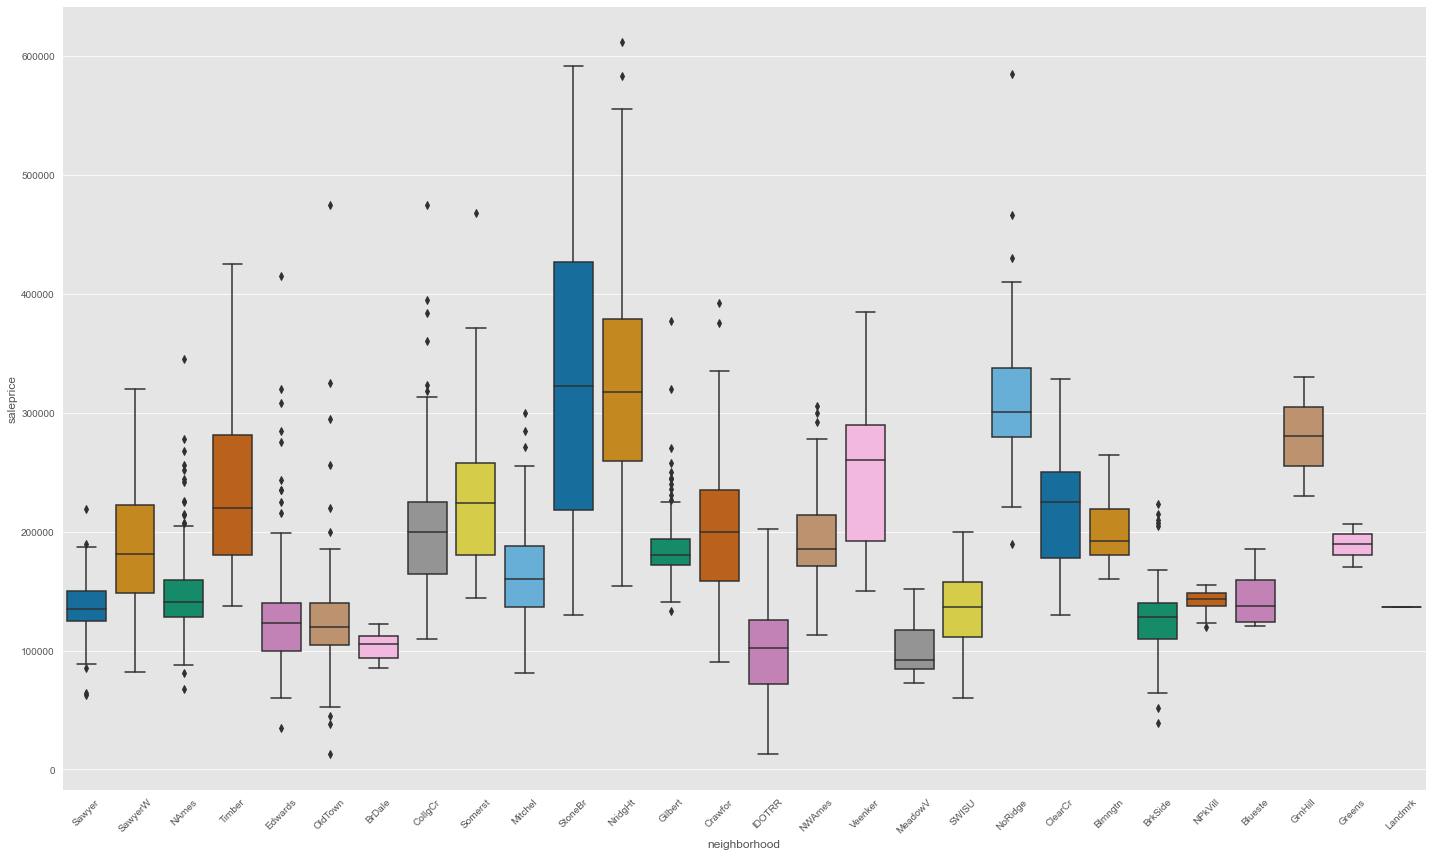

In [44]:
plt.figure(figsize=(20,12))
sns.boxplot(x=df_train['neighborhood'], y=df_train['saleprice'], palette='colorblind')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../images/saleprice_neighborhood_boxplot_train.png', transparent = True)

In [45]:
df_neighbourhood_saleprice = pd.concat([df_train['neighborhood'], df_train['saleprice']], axis = 1, join='outer')
df_neighbourhood_saleprice

,neighborhood,saleprice
0,Sawyer,130500
1,SawyerW,220000
2,NAmes,109000
3,Timber,174000
4,SawyerW,138500
5,NAmes,190000
6,Edwards,140000
7,NAmes,142000
8,OldTown,112500
9,NAmes,135000


In [46]:
df_meansaleprice_neighbourhood = pd.DataFrame(df_neighbourhood_saleprice.groupby(by='neighborhood').mean().sort_values(by='saleprice', ascending=False))
df_meansaleprice_neighbourhood.head()

,saleprice
neighborhood,
StoneBr,329675.737
NridgHt,322831.352
NoRidge,316294.125
GrnHill,280000.000
Veenker,253570.588


The top five neighborhoods that yield the highest average property prices are as seen above.

In [47]:
np.array_split(df_meansaleprice_neighbourhood, 4)

[              saleprice
 neighborhood           
 StoneBr      329675.737
 NridgHt      322831.352
 NoRidge      316294.125
 GrnHill      280000.000
 Veenker      253570.588
 Timber       241051.354
 Somerst      227183.900,
               saleprice
 neighborhood           
 ClearCr      217490.074
 Crawfor      205901.211
 CollgCr      202497.217
 Blmngtn      200417.682
 NWAmes       194619.023
 Gilbert      189228.388
 Greens       188666.667,
               saleprice
 neighborhood           
 SawyerW      187760.161
 Mitchel      167656.707
 NAmes        145905.816
 Blueste      144566.667
 NPkVill      140476.471
 Sawyer       137181.910
 Landmrk      137000.000,
               saleprice
 neighborhood           
 SWISU        134758.875
 Edwards      129905.787
 BrkSide      127022.697
 OldTown      125276.301
 BrDale       103371.053
 IDOTRR       101103.188
 MeadowV      100231.250]

By finding out the mean `SalePrice` of each `Neighborhood`, we can sort them in ascending order and split them into ordinal variables which will be mapped, as opposed to dummifying the `Neighborhood` columns.

### Target Variable `SalePrice`

Since the target variable is `SalePrice`, it is important to understand the distribution and properties of `SalePrice` for fitting a linear model.

In [48]:
df_train['saleprice'].mean()

181479.01805758907

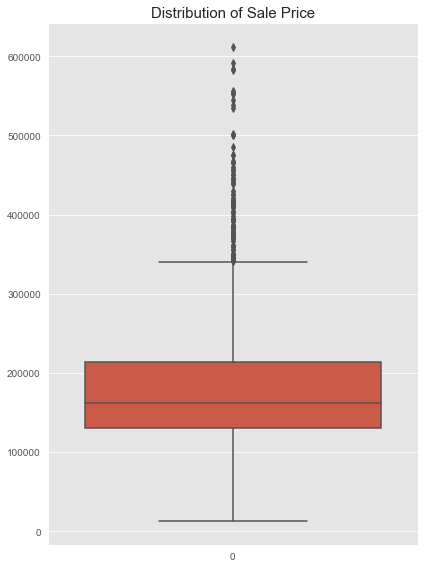

In [49]:
plt.figure(figsize=(6,8))
sns.boxplot(data = df_train['saleprice'], orient='v')
plt.title(label = 'Distribution of Sale Price', fontsize = 15)
plt.tight_layout()
plt.savefig('../images/saleprice_boxplot_train.png', transparent = True)

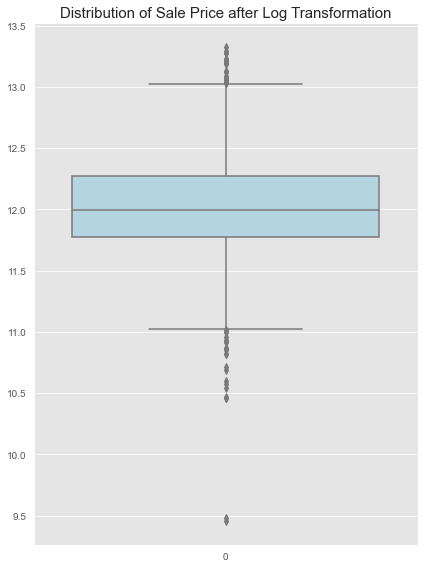

In [50]:
plt.figure(figsize=(6,8))
sns.boxplot(data = np.log(df_train['saleprice']), orient='v', color='lightblue')
plt.title(label = 'Distribution of Sale Price after Log Transformation', fontsize = 15)
plt.tight_layout()
plt.savefig('../images/saleprice_log_boxplot_train.png', transparent = True)

As seen in the box plots above, `SalePrice` has a skewed distribution. We will need to log function the `SalePrice` in order to get it to nearer to a normal distribution and reduce the imbalance of classes. `saleprice_log` will now replace `SalePrice` as the new target variable.

In [51]:
df_train['saleprice_log'] = np.log(df_train['saleprice'])
df_train.drop(columns=['saleprice'], axis = 0, inplace=True)

In [52]:
df_shape(df_train, df_test)

(2049, 75)
(878, 74)


In [53]:
df_train.corr()['saleprice_log'].sort_values(ascending=False)

saleprice_log      1.000
overall_qual       0.826
gr_liv_area        0.708
garage_cars        0.667
total_bsmt_sf      0.656
garage_area        0.655
1st_flr_sf         0.626
year_built         0.625
year_remod/add     0.600
full_bath          0.566
totrms_abvgrd      0.501
fireplaces         0.487
mas_vnr_area       0.448
bsmtfin_sf_1       0.429
open_porch_sf      0.332
wood_deck_sf       0.331
lot_frontage       0.329
garage_yr_blt      0.329
half_bath          0.301
bsmt_full_bath     0.287
lot_area           0.286
2nd_flr_sf         0.257
bsmt_unf_sf        0.195
bedroom_abvgr      0.176
screen_porch       0.126
3ssn_porch         0.055
pool_area          0.032
mo_sold            0.031
bsmtfin_sf_2       0.027
misc_val          -0.004
yr_sold           -0.020
bsmt_half_bath    -0.026
overall_cond      -0.037
id                -0.047
low_qual_fin_sf   -0.051
ms_subclass       -0.070
kitchen_abvgr     -0.136
enclosed_porch    -0.149
Name: saleprice_log, dtype: float64

### Relevant Area (in sqft) Variables

>`Lot Frontage` : Linear feet of street connected to property<br/>
`Lot Area` : Lot size in square feet<br/>
`BsmtFin SF 1` : Type 1 finished square feet <br/>
`BsmtFin SF 2` : Type 2 finished square feet <br/>
`Bsmt Unf SF` : Unfinished square feet of basement area <br/>
`Total Bsmt SF` : Total square feet of basement area <br/>
`1st Flr SF` : First Floor square feet <br/>
`2nd Flr SF` : Second floor square feet <br/>
`Low Qual Fin SF` : Low quality finished square feet (all floors) <br/>
`Gr Liv Area` : Above grade (ground) living area square feet <br/>
`Garage Area` : Size of garage in square feet<br/>
`Wood Deck SF` : Wood deck area in square feet<br/>
`Open Porch SF` : Open porch area in square feet<br/>
`Enclosed Porch` : Enclosed porch area in square feet<br/>
`3Ssn Porch` : Three season porch area in square feet<br/>
`Screen Porch` : Screen porch area in square feet<br/>
`Pool Area` : Pool area in square feet<br/>

Looking at the data dictionary, we can drop some features as they have multi-collinearity. <br/>

>`BsmtFin SF 1` + `BsmtFin SF 2` + `Bsmt Unf SF` = `Total Bsmt SF`<br/>
`1st Flr SF` + `2nd Flr SF` + `Low Qual Fin SF` = `Gr Liv Area` <br/>


In [54]:
# checking if equation is true
(df_train['bsmtfin_sf_1'] + df_train['bsmtfin_sf_2'] + df_train['bsmt_unf_sf'] == df_train['total_bsmt_sf']).sum()

2049

In [55]:
# checking if equation is true
(df_train['1st_flr_sf'] + df_train['2nd_flr_sf'] + df_train['low_qual_fin_sf'] == df_train['gr_liv_area']).sum()

2049

Since the equations are true, we can check each feature's correlation value with `SalePrice` and decide whether to drop them entirely. Only `Gr Liv Area`, `Total Bsmt SF`, `1st Flr SF` and `BsmtFin SF 1` will be retained as they have correlation values of more than 0.5.<br/>

As `Enclosed Porch`, `3Ssn Porch`, `Screen Porch` and `Pool Area` have correlation values of less than 0.2, they will also be dropped from both datasets

In [56]:
# def function to drop unnecessary area features for both dataset 

def drop_area_features(df1, df2):
    df1.drop(['bsmtfin_sf_2', 'bsmt_unf_sf', 
              '2nd_flr_sf', 'low_qual_fin_sf', 
              'enclosed_porch', '3ssn_porch', 
              'screen_porch', 'pool_area'], axis=1, inplace=True)
    df2.drop(['bsmtfin_sf_2', 'bsmt_unf_sf', 
              '2nd_flr_sf', 'low_qual_fin_sf', 
              'enclosed_porch', '3ssn_porch', 
              'screen_porch', 'pool_area'], axis=1, inplace=True)
    return

In [57]:
drop_area_features(df_train, df_test)

In [58]:
#checking successful drop
df_shape(df_train, df_test)

(2049, 67)
(878, 66)


### Plotting a Heatmap of the Correlation Matrix

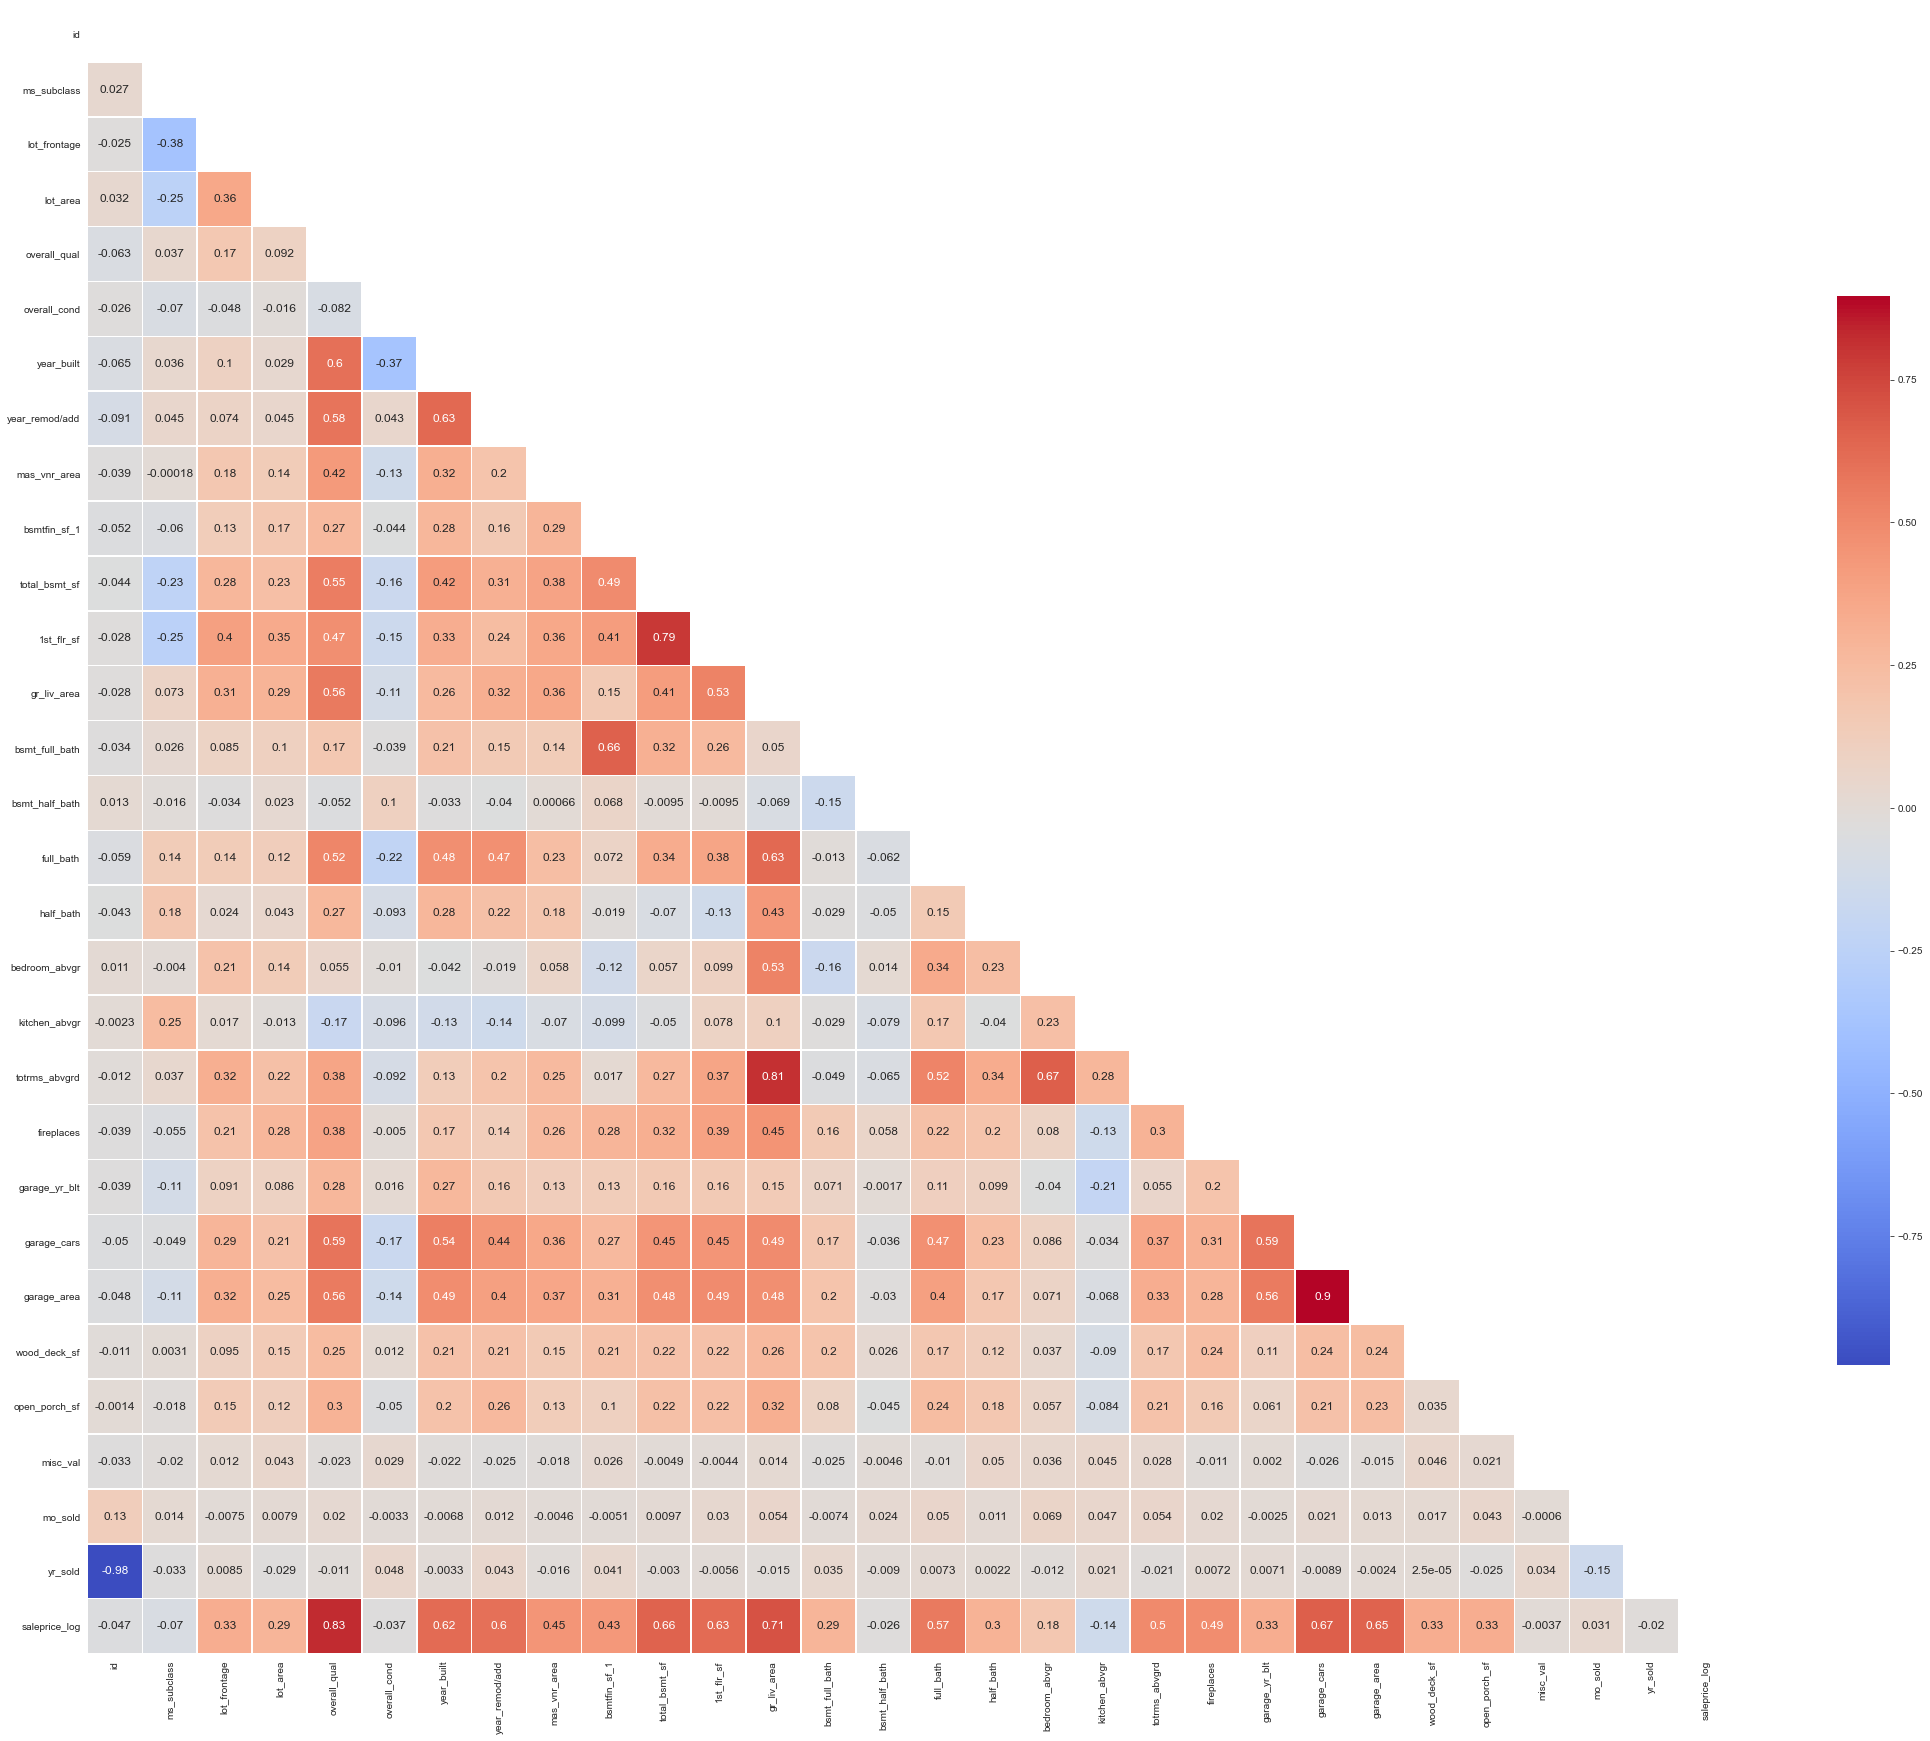

In [59]:
plt.figure(figsize=(30,30))
sns.set_style('white')
sns.heatmap(df_train.corr(), 
            mask = np.triu(df_train.corr()), 
            cmap='coolwarm', 
            linewidth = 0.5,
            linecolor = 'w',
            square=True,
            annot=True, 
            annot_kws={"size":12},
            cbar_kws={"shrink": 0.5})
plt.tight_layout()
plt.savefig('../images/heatmap_numerical_variables.png', transparent = True)

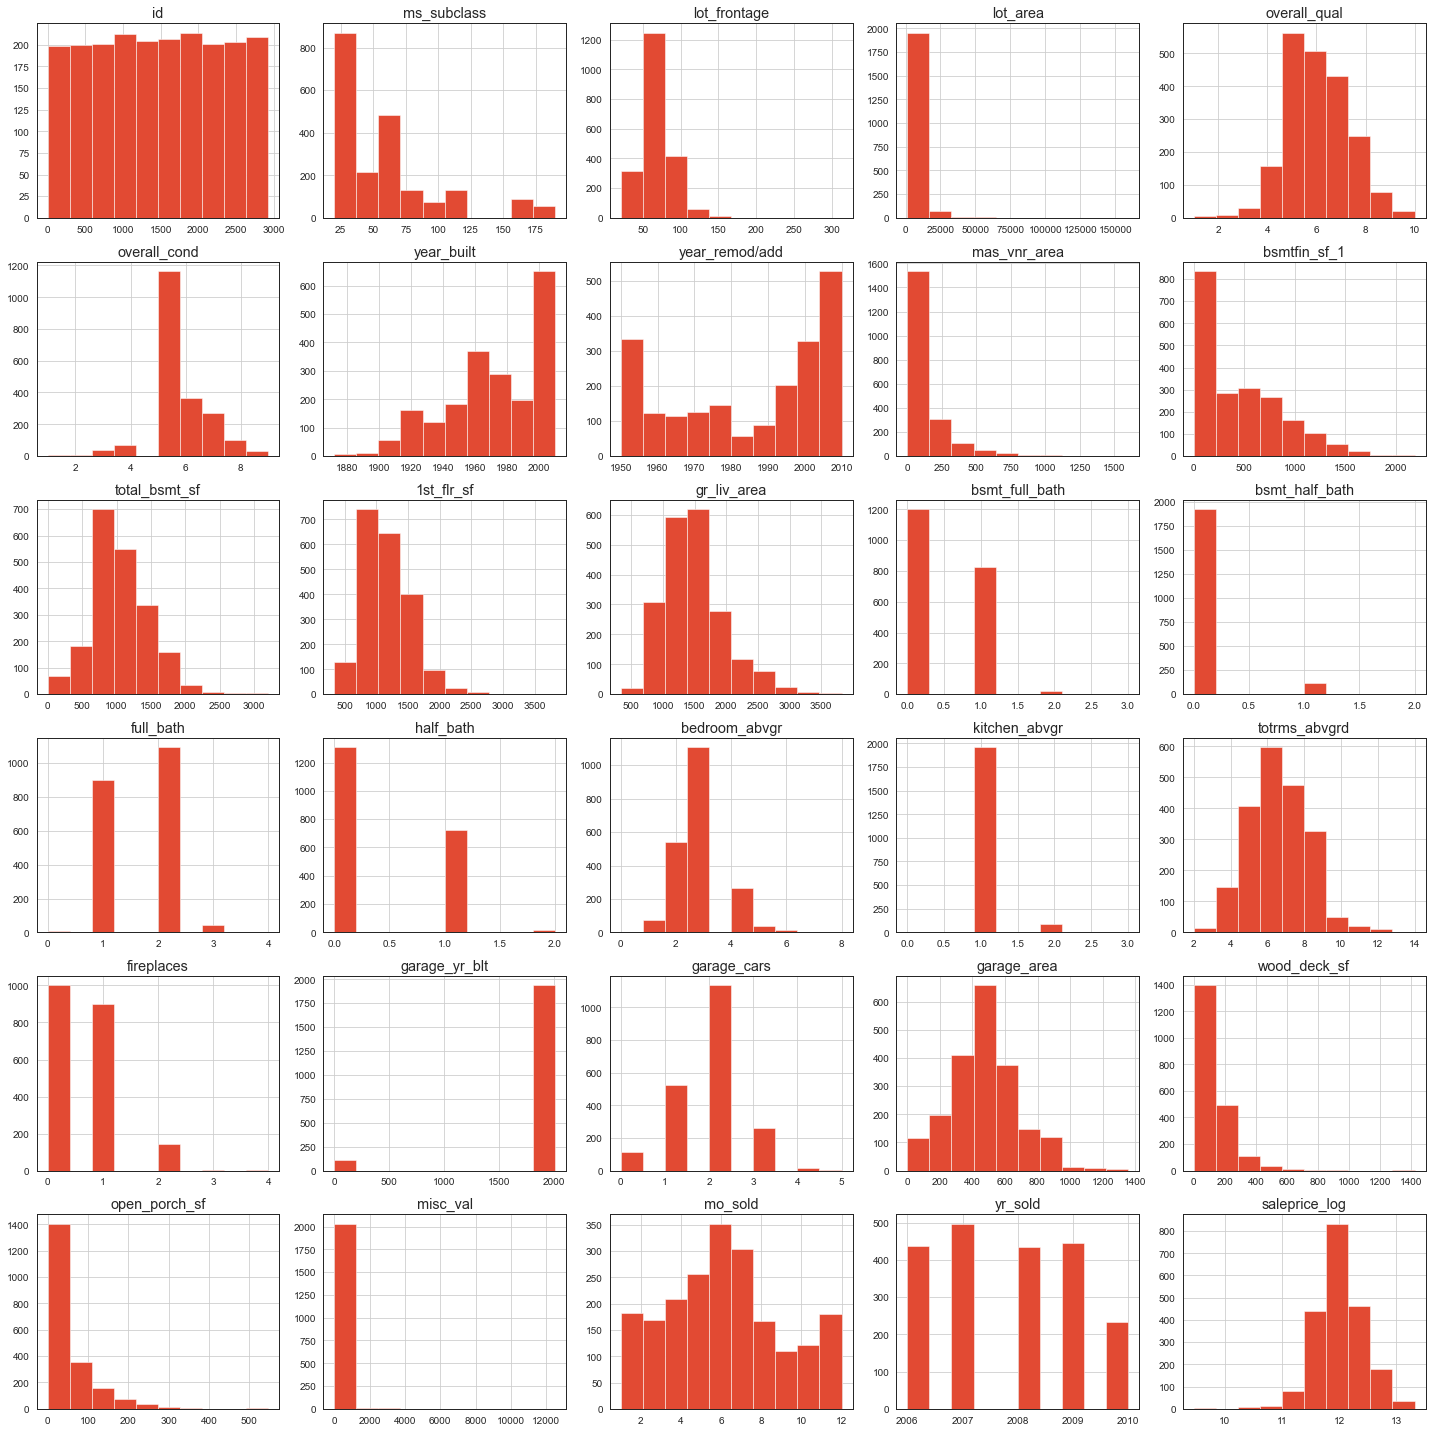

In [60]:
df_train.hist(figsize=(20,20))
plt.tight_layout()
plt.savefig('../images/histogram_numerical variables.png', transparent = True);

## Exporting Clean Datasets for Feature Engineering
---

In [61]:
df_train_v0.to_csv('../data/train_clean_v0.csv', index=False)

In [62]:
df_test_v0.to_csv('../data/test_clean_v0.csv', index=False)

In [63]:
df_train.to_csv('../data/train_clean_v1.csv', index=False)

In [64]:
df_test.to_csv('../data/test_clean_v1.csv', index=False)